In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

#### Armazenando dataset em um array

In [2]:
concrete_data = pd.read_excel("./Concrete_Data.xls")
concrete_data.drop("Water  (component 4)(kg in a m^3 mixture)", axis=1, inplace=True)


#### Mostrando os nomes das características

In [3]:
for col in concrete_data.columns:
    print(col)

Cement (component 1)(kg in a m^3 mixture)
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Fly Ash (component 3)(kg in a m^3 mixture)
Superplasticizer (component 5)(kg in a m^3 mixture)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Fine Aggregate (component 7)(kg in a m^3 mixture)
Age (day)
Concrete compressive strength(MPa, megapascals) 


#### Mostrando as (15) primeiras linhas do banco de dados

In [4]:
concrete_data.head(15)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,0.0,932.0,594.0,28,39.289790


#### Adicionando análise de matriz de correlação entre as colunas
Pode-se perceber que algumas características, como Fly Ash, possuem correlação negativa com relação a coluna de saída, o que pode nos ajudar a ajustar o modelo. 
Obs: com a remoção de alguma dessas características, mesmo as com correlação negativa, o RMSE geralmente aumenta uma casa decimal.

In [5]:
concrete_data.corr().round(2)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.00,-0.28,-0.40,0.09,-0.11,-0.22,0.08,0.50
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.28,1.00,-0.32,0.04,-0.28,-0.28,-0.04,0.13
Fly Ash (component 3)(kg in a m^3 mixture),-0.40,-0.32,1.00,0.38,-0.01,0.08,-0.15,-0.11
Superplasticizer (component 5)(kg in a m^3 mixture),0.09,0.04,0.38,1.00,-0.27,0.22,-0.19,0.37
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.11,-0.28,-0.01,-0.27,1.00,-0.18,-0.00,-0.16
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.22,-0.28,0.08,0.22,-0.18,1.00,-0.16,-0.17
Age (day),0.08,-0.04,-0.15,-0.19,-0.00,-0.16,1.00,0.33
"Concrete compressive strength(MPa, megapascals)",0.50,0.13,-0.11,0.37,-0.16,-0.17,0.33,1.00


#### Dividindo o dataset em conjunto de treinamento e conjunto de teste

Variáveis finais:
- `label_train`, `label_test` : array de label ('Concrete compressive strength(MPa, megapascals)) de treino e teste, respectivamente
- `X_train`, `X_test`: matriz de treino e teste, respectivamente, sem o Y

In [6]:
tam = concrete_data.shape[0]
tam_train = int(0.7 * tam)
tam_test = int(0.3 * tam)

print(f"O dataset original tem {tam} linhas. O de treino, com 70%, tem {tam_train} e o de teste, com 30%, tem {tam_test}.")

O dataset original tem 1030 linhas. O de treino, com 70%, tem 721 e o de teste, com 30%, tem 309.


In [7]:
labels = concrete_data['Concrete compressive strength(MPa, megapascals) ']
labels_arr = np.asarray(labels)
label_train, label_test = labels_arr[:tam_train, ...], labels_arr[tam_train:, ...]


np.set_printoptions(threshold=10)
print(f"Y treino:\n {label_train}. \n\n Y teste:\n {label_test}.")


Y treino:
 [79.98611076 61.88736576 40.26953526 ... 10.35455057 43.56523054
 51.86376367]. 

 Y teste:
 [11.85209244 17.24379476 27.82725136 ... 23.69660064 32.76803638
 32.40123514].


In [8]:
concrete_data_train = concrete_data.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
concrete_data_train_arr = np.asarray(concrete_data_train)
X_train = concrete_data_train_arr[:tam_train]
print(len(X_train))

721


In [9]:
concrete_data_train_arr = np.asarray(concrete_data_train)
X_test = concrete_data_train_arr[tam_train:]
print(len(X_test))

309


#### Construindo a matriz A

In [10]:
ones = np.ones((tam_train, 1))  
A = np.hstack((X_train, ones))

print(f"Matriz A com viés:\n {A}")

Matriz A com viés:
 [[540.    0.    0.  ... 676.   28.    1. ]
 [540.    0.    0.  ... 676.   28.    1. ]
 [332.5 142.5   0.  ... 594.  270.    1. ]
 ...
 [122.6 183.9   0.  ... 800.1   7.    1. ]
 [166.8 250.2   0.  ... 692.6  90.    1. ]
 [203.5 305.3   0.  ... 630.   90.    1. ]]


#### Verificando se há colunas LD
Calculando se o posto é máximo

In [11]:
rank = np.linalg.matrix_rank(A)
print(f"Quantidade de colunas linearmente dependentes: {len(A[0])-rank}")

Quantidade de colunas linearmente dependentes: 0


#### Fazendo o cálculo dos coeficientes

Sobre a técnica de mínimos quadrados: ela é utilizada implícitamente no processo de decomposição QR e na resolução do sistema linear que determina os coeficientes do modelo de regressão linear.

A equação normal da regressão linear, que é derivada do método dos mínimos quadrados, é:

**A.T · A · x_  = A.T · b** 

Onde A é a matriz de design (matriz de características com a coluna de viés) e b é o vetor de saída (target). O vetor x_ são os coeficientes do modelo que queremos encontrar.

**(QR).T · QR · x_ = (QR).T · b = R.T · R · x_ = Q.T · b**

Isso reduz o problema a resolver **R · x_ = Q.T · b**, após simplificar o problema com a propriedade de Q ser ortogonal. Essa simplificação elimina a necessidade de calcular **A.T · A e A.T · b** diretamente, o que pode ser numéricamente instável e computacionalmente custoso especialmente para matrizes grandes.

Quando utilizamos a função solve_triangular para resolver **R · x_ = Q.T · b**, estamos diretamente aplicando a solução dos mínimos quadrados através de uma abordagem mais estável numericamente. Este método é particularmente útil para evitar problemas como a multicolinearidade, que pode causar instabilidade na inversão de **A.T · A** diretamente.


In [12]:
Q, R = scipy.linalg.qr(A, mode='economic')

x_ = scipy.linalg.solve_triangular(R, np.dot(np.transpose(Q), label_train))

print(x_)

[ 1.37561646e-01  1.20922873e-01  1.18628902e-01  5.55121739e-01
  5.59995070e-02  4.75698500e-02  1.22813650e-01 -1.18635790e+02]


#### Fazendo a estimativa dos dados de teste a partir dos coeficientes x_

In [13]:
ones = np.ones((tam_test, 1))  
X_test = np.hstack((X_test, ones))

In [14]:
%time
predicted_y = np.dot(X_test, x_)

CPU times: user 12 µs, sys: 14 µs, total: 26 µs
Wall time: 4.29 µs


In [15]:
np.set_printoptions(threshold=np.inf)
print(f"Predição de 'Concrete compressive strength':\n {predicted_y}")

Predição de 'Concrete compressive strength':
 [20.5312373  21.0224919  23.60157854 31.21602481 34.90043429 23.7198968
 24.2111514  26.79023804 34.40468431 38.08909379 27.36115294 27.85240754
 30.43149418 38.04594045 41.73034993 15.1596368  17.73872344 20.56282955
 23.14191619 16.2354711  37.54598213 45.1604284  32.57072231 19.52124721
 22.10033385 42.42760953 42.67323683 43.16449143 44.02418698 45.74357807
 48.66695726 49.52665281 51.2460439  58.86049017 69.91371863 80.96694708
 21.78063471 22.64033026 24.35972135 27.79850354 31.97416762 43.02739608
 24.83957616 25.08520346 25.57645806 26.4361536  28.1555447  43.01621534
 65.12267225 26.71444783 21.27819937 28.55805679 31.13714343 34.28266848
 22.10033385 24.58844292 27.16752956 19.24927826 21.8283649  17.68272393
 20.09255262 22.67163926 30.28608553 15.73424818 21.76945397 24.34854061
 31.96298688 27.20570243 29.78478907 37.39923534 48.45246379 70.5589207
 18.03530496 38.42237078 67.85029394 53.35802434 64.4112528  75.46448125
 48.175

#### Calculando o RMSE
Foram calculados tanto o rmse dos dados de treino quanto dos dados de teste, para avaliação

In [16]:
def rmse(array1, array2):

    diff = (np.array(array1) - np.array(array2)) ** 2

    mean_diff = np.mean(diff)

    rmse = np.sqrt(mean_diff)

    return rmse

rmse_teste = rmse(predicted_y, label_test)

print("RMSE entre os arrays:", rmse_teste)


RMSE entre os arrays: 8.671712453707286


#### Desenhando o gráco valores reais (no eixo x) por valores estimados (eixo y), com a reta pontilhada representando a bissetriz do primeiro quadrante

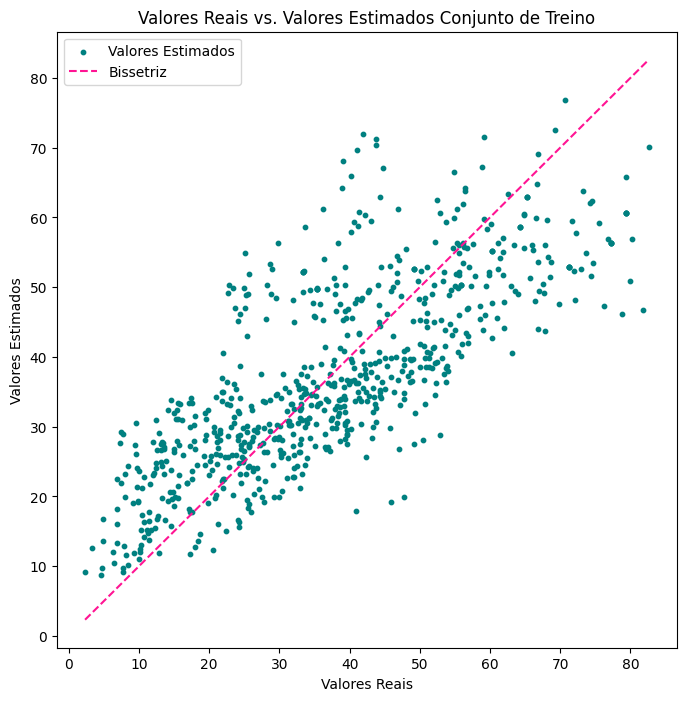

In [17]:
def plot_valores_reais(real_y, y_predicted, title):
    plt.figure(figsize=(8, 8))
    
    plt.scatter(real_y, y_predicted, color='teal', label='Valores Estimados', s=10)
    
    # Adicionando a reta pontilhada representando a bissetriz do primeiro quadrante
    max_val = max(real_y.max(), y_predicted.max())
    min_val = min(real_y.min(), y_predicted.min())
    plt.plot([min_val, max_val], [min_val, max_val], color='deeppink', linestyle='--', label='Bissetriz')
    
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Estimados')
    plt.title(f'Valores Reais vs. Valores Estimados Conjunto de {title}')
    plt.legend()
    plt.show()

predicted_y_train = np.dot(A, x_)
plot_valores_reais(label_train, predicted_y_train, "Treino")


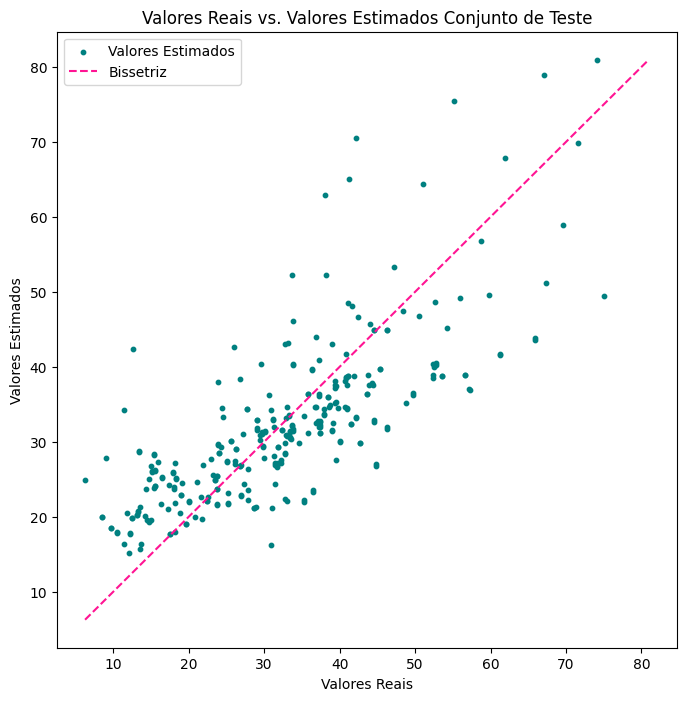

In [18]:
plot_valores_reais(label_test, predicted_y, "Teste")